<a href="https://colab.research.google.com/github/loshigos2024/artificial_intelligence/blob/main/Markov_Crop_Growth_Stages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Markov chain models in agriculture**

Markov chain models are powerful tools used in agriculture to analyze and predict the dynamics of crop yields, livestock populations, or environmental factors. Markov chain model components:

**States**

The possible conditions or stages that a system can be in. For example, in a crop growth model, states could be seedling, vegetative, flowering, and maturity.

**Transitions**

The probabilities of moving from one state to another over a specific period of time. These probabilities are based on historical data and assumptions about the system.

**Time Steps**

Discrete intervals of time over which the system's state can change. For example, the time step could be a day, a week, or a season.

**Example: Markov Chain Model of Crop Growth Stages**

The Markov Chain Model of Crop Growth Stages is a predictive tool used to model the progression of a crop through its various growth stages, such as Seedling, Vegetative, Flowering, and Maturity. This model assumes that the future growth stage of the crop depends only on its current stage, not on the sequence of stages that preceded it. By defining transition probabilities between each stage, the model can predict the likely next stage of the crop and estimate the probability of the crop being in any particular stage after a certain number of transitions. This approach helps in making informed decisions about crop management and planning agricultural activities.

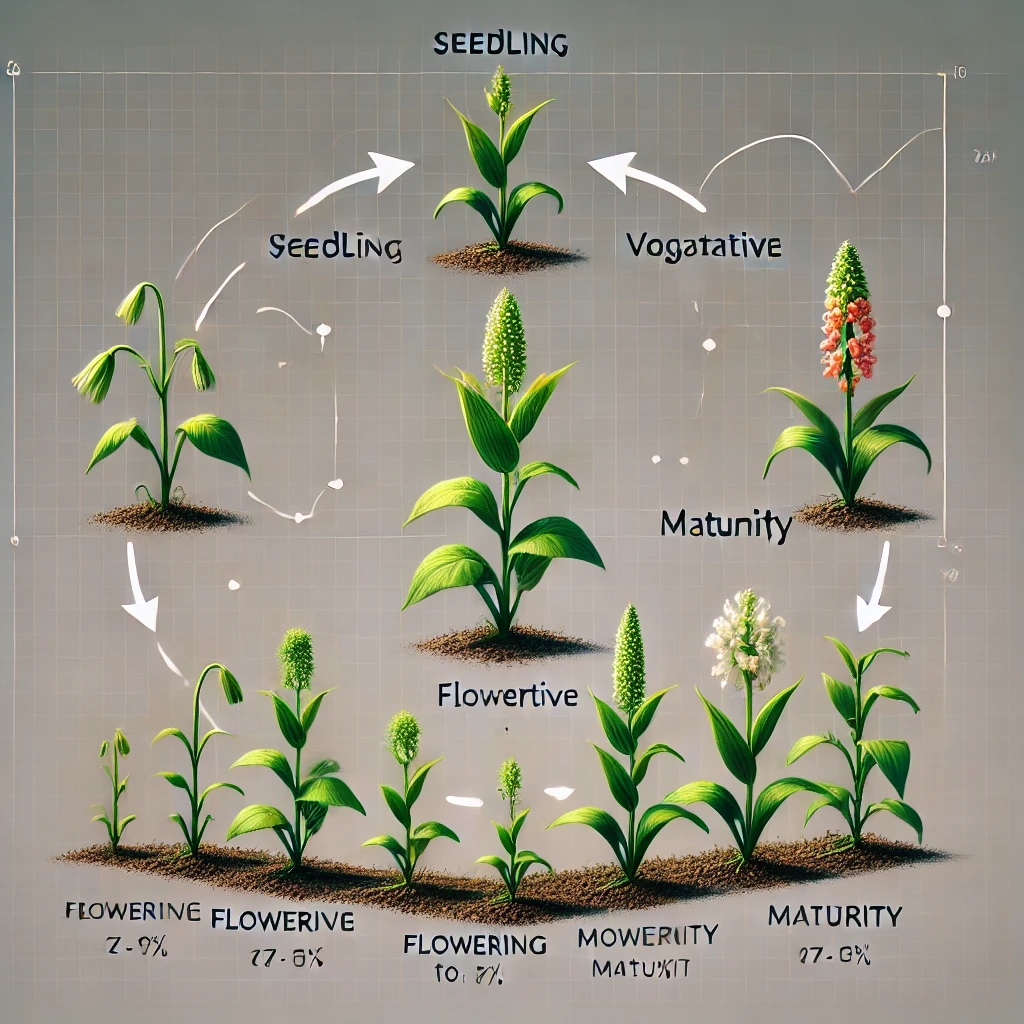

# **Importación de paquetes requeridos**

Importamos el paquete NumPy es muy útil para realizar cálculos lógicos y matemáticos sobre cuadros y matrices.

In [1]:
import numpy as np


1. Define the States

Let's define the states representing different crop growth stages:

State 1 (Seedling - S): Initial growth stage.

State 2 (Vegetative - V): Growth stage where the plant's leaves and stems develop.

State 3 (Flowering - F): Stage where the plant flowers.

State 4 (Maturity - M): Final growth stage before harvest.

2. Observation Data (Sequence of States)

Based on the provided data, we observe the following sequence of growth stages over two years:


O=[S, V, F, M, S, V, F, M]


In [2]:
# Define the states (Crop Growth Stages)
states = ['Seedling', 'Vegetative', 'Flowering', 'Maturity']

3. Frequency Table

Using the observed sequence, we can create a frequency table that shows the number of transitions between each pair of states.



\begin{array}{c|cccc|c}
\text{From -> To} & S & V & F & M & \text{Total} \\
\hline
S & 0 & 2 & 0 & 0 & 2 \\
V & 0 & 0 & 2 & 0 & 2 \\
F & 0 & 0 & 0 & 2 & 2 \\
M & 1 & 0 & 0 & 1 & 2 \\
\hline
\text{Total} & 1 & 2 & 2 & 3 & 8 \\
\end{array}



4. Transition Matrix

The transition matrix is created by dividing each entry in the frequency table by the total number of transitions from each state:

[
P =
\begin{pmatrix}
P(S \rightarrow S) & P(S \rightarrow V) & P(S \rightarrow F) & P(S \rightarrow M) \\
P(V \rightarrow S) & P(V \rightarrow V) & P(V \rightarrow F) & P(V \rightarrow M) \\
P(F \rightarrow S) & P(F \rightarrow V) & P(F \rightarrow F) & P(F \rightarrow M) \\
P(M \rightarrow S) & P(M \rightarrow V) & P(M \rightarrow F) & P(M \rightarrow M)
\end{pmatrix}
=
\begin{pmatrix}
\frac{0}{2} & \frac{2}{2} & \frac{0}{2} & \frac{0}{2} \\
\frac{0}{2} & \frac{0}{2} & \frac{2}{2} & \frac{0}{2} \\
\frac{0}{2} & \frac{0}{2} & \frac{0}{2} & \frac{2}{2} \\
\frac{1}{2} & \frac{0}{2} & \frac{0}{2} & \frac{1}{2}
\end{pmatrix}
=
\begin{pmatrix}
0.000 & 1.000 & 0.000 & 0.000 \\
0.000 & 0.000 & 1.000 & 0.000 \\
0.000 & 0.000 & 0.000 & 1.000 \\
0.500 & 0.000 & 0.000 & 0.500
\end{pmatrix}
\]

In [3]:
# Define the transition matrix
# P represents the transition probabilities between states
P = np.array([
    [0.000, 1.000, 0.000, 0.000],  # Seedling -> [Seedling, Vegetative, Flowering, Maturity]
    [0.000, 0.000, 1.000, 0.000],  # Vegetative -> [Seedling, Vegetative, Flowering, Maturity]
    [0.000, 0.000, 0.000, 1.000],  # Flowering -> [Seedling, Vegetative, Flowering, Maturity]
    [0.500, 0.000, 0.000, 0.500]   # Maturity -> [Seedling, Vegetative, Flowering, Maturity]
])

# Initial state distribution (assuming we start with Seedling)

Based on state order

states = [Seedling, Vegetative, Flowering, Maturity]

where 1 indicates that it is the initial state and 0 means that it is not the initial state

In [4]:
# Initial state distribution (assuming we start with Seedling)
initial_state = np.array([1.0, 0.0, 0.0, 0.0])


Predict Next State Function:

The **predict_next_state** function predicts the next state based on the current state using the transition matrix.



In [5]:
def predict_next_state(current_state):
    """Predict the next crop growth stage."""
    current_state_index = states.index(current_state)
    #Esta línea obtiene la fila de la matriz P que corresponde al estado actual (current_state_index). Esa fila contiene las probabilidades de transición del estado actual hacia todos los posibles estados siguientes.
    next_state_probabilities = P[current_state_index]
    #La función np.argmax() (de la biblioteca numpy) encuentra el índice del valor máximo en el array next_state_probabilities, que es la fila de probabilidades obtenida en la línea anterior.
    next_state_index = np.argmax(next_state_probabilities)
    return states[next_state_index]


# Example usage
current_state = 'Seedling'
predicted_next_state = predict_next_state(current_state)
print("Predicted next state:", predicted_next_state)

Predicted next state: Vegetative


Simulate Growth Stages Function:

The **simulate_growth_stages** function simulates the sequence of growth stages over a specified number of steps, starting from the initial state.

Example Usage:


We simulate the crop growth stages over 5 steps starting from Seedling.

In [6]:


def simulate_growth_stages(initial_state, steps):
    """Simulate the growth stages over a number of steps."""
    current_state_index = np.argmax(initial_state)
    current_state = states[current_state_index]

    growth_stages = [current_state]
    for _ in range(steps):
        next_state = predict_next_state(current_state)
        growth_stages.append(next_state)
        current_state = next_state

    return growth_stages


# Example usage
initial_state = 'Seedling'
steps = 5  # Number of steps to simulate

predicted_growth_stages = simulate_growth_stages(initial_state, steps)
print("Predicted Growth Stages:", predicted_growth_stages)

Predicted Growth Stages: ['Seedling', 'Vegetative', 'Flowering', 'Maturity', 'Seedling', 'Vegetative']



**Predict Future State Probability Function: **

The predict_future_state_probability function predicts the probability distribution over the states after a certain number of steps.

It takes the initial state vector and the number of steps as inputs.

It raises the transition matrix P to the power of the number of steps using np.linalg.matrix_power(P, steps) and then multiplies it by the initial state vector.

--------------------------------------------------------

*LINK Multiplicación de Matrices:* https://www.youtube.com/watch?v=09-Ybrkwzgk


*LINK Potencia de matrices A^5 | Multiplicación de matrices:*
https://www.youtube.com/watch?v=fXZw2VTYsJw

--------------------------------------------------------


The resulting vector (future_state_vector) contains the probabilities of being in each state after the specified number of steps.

Example Usage:

The example predicts the probability distribution over states after 3 steps starting from the Seedling state.

In [9]:
def predict_future_state_probability(initial_state_vector, steps):
    """Predict the probability distribution over states after a number of steps."""
    future_state_vector = np.dot(initial_state_vector, np.linalg.matrix_power(P, steps))
    return future_state_vector

# Convert initial state to a vector
initial_state_vector = np.array([1.0, 0.0, 0.0, 0.0])
#initial_state_vector = np.zeros(len(states))
#initial_state_vector[states.index(initial_state)] = 1.0

# Predict the probability distribution over states after a certain number of steps
future_steps = 3
future_state_probabilities = predict_future_state_probability(initial_state_vector, future_steps)
print(f"Probability distribution after {future_steps} steps: {future_state_probabilities}")

# Print the probability of each state
for state, probability in zip(states, future_state_probabilities):
    print(f"Probability of being in {state} after {future_steps} steps: {probability:.4f}")

Probability distribution after 3 steps: [0. 0. 0. 1.]
Probability of being in Seedling after 3 steps: 0.0000
Probability of being in Vegetative after 3 steps: 0.0000
Probability of being in Flowering after 3 steps: 0.0000
Probability of being in Maturity after 3 steps: 1.0000


# **Codigo completo:**

Python Code: Markov Chain Model with Future State Probability Prediction

In [ ]:
import numpy as np

# Define the states (Crop Growth Stages)
states = ['Seedling', 'Vegetative', 'Flowering', 'Maturity']

# Define the transition matrix
# P represents the transition probabilities between states
P = np.array([
    [0.000, 1.000, 0.000, 0.000],  # Seedling -> [Seedling, Vegetative, Flowering, Maturity]
    [0.000, 0.000, 1.000, 0.000],  # Vegetative -> [Seedling, Vegetative, Flowering, Maturity]
    [0.000, 0.000, 0.000, 1.000],  # Flowering -> [Seedling, Vegetative, Flowering, Maturity]
    [0.500, 0.000, 0.000, 0.500]   # Maturity -> [Seedling, Vegetative, Flowering, Maturity]
])

# Initial state distribution (assuming we start with Seedling)
initial_state = np.array([1.0, 0.0, 0.0, 0.0])

def predict_next_state(current_state):
    """Predict the next crop growth stage."""
    current_state_index = states.index(current_state)
    next_state_probabilities = P[current_state_index]
    next_state_index = np.argmax(next_state_probabilities)
    return states[next_state_index]

def simulate_growth_stages(initial_state, steps):
    """Simulate the growth stages over a number of steps."""
    current_state_index = np.argmax(initial_state)
    current_state = states[current_state_index]

    growth_stages = [current_state]
    for _ in range(steps):
        next_state = predict_next_state(current_state)
        growth_stages.append(next_state)
        current_state = next_state

    return growth_stages

def predict_future_state_probability(initial_state_vector, steps):
    """Predict the probability distribution over states after a number of steps."""
    future_state_vector = np.dot(initial_state_vector, np.linalg.matrix_power(P, steps))
    return future_state_vector

# Example usage
initial_state = 'Seedling'
steps = 5  # Number of steps to simulate

predicted_growth_stages = simulate_growth_stages(initial_state, steps)
print("Predicted Growth Stages:", predicted_growth_stages)

# Convert initial state to a vector
initial_state_vector = np.zeros(len(states))
initial_state_vector[states.index(initial_state)] = 1.0

# Predict the probability distribution over states after a certain number of steps
future_steps = 3
future_state_probabilities = predict_future_state_probability(initial_state_vector, future_steps)
print(f"Probability distribution after {future_steps} steps: {future_state_probabilities}")

# Print the probability of each state
for state, probability in zip(states, future_state_probabilities):
    print(f"Probability of being in {state} after {future_steps} steps: {probability:.4f}")
